In [1]:
%matplotlib inline
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.utils import *
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [0]:
epoch = 100
batch_size = 128
learning_rate = 1e-2
initializer = initializers.he_normal(seed=114)

In [0]:
def basic_layer(node, dropoutrate = 0):
    layer = models.Sequential()
    layer.add(layers.Dense(node, kernel_initializer=initializer))
    if(dropoutrate>0):
        layer.add(layers.Dropout(dropoutrate))
    layer.add(layers.BatchNormalization())
    layer.add(layers.Activation('elu'))
    return layer

In [5]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(basic_layer(128))
model.add(basic_layer(128))
model.add(basic_layer(256, 0.125))
model.add(basic_layer(256, 0.125))
model.add(basic_layer(512, 0.25))
model.add(basic_layer(512, 0.25))
model.add(basic_layer(256))
model.add(basic_layer(128))
model.add(basic_layer(64))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 128)               100992    
_________________________________________________________________
sequential_2 (Sequential)    (None, 128)               17024     
_________________________________________________________________
sequential_3 (Sequential)    (None, 256)               34048     
_________________________________________________________________
sequential_4 (Sequential)    (None, 256)               66816     
_________________________________________________________________
sequential_5 (Sequential)    (None, 512)               133632    
_________________________________________________________________
sequential_6 (Sequential)    (None, 512)               2

In [7]:
adam = optimizers.Adam(lr = learning_rate)
model.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
aug = preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True)
batches = aug.flow(x_train, y_train, batch_size=batch_size)
val_batches = aug.flow(x_test, y_test, batch_size=batch_size)
history = model.fit_generator(batches, 
                               epochs=epoch,
                               validation_data=val_batches, verbose=2)

Epoch 1/100
Epoch 1/100
469/469 - 31s - loss: 0.8130 - acc: 0.6936 - val_loss: 0.8753 - val_acc: 0.7289
Epoch 2/100
Epoch 1/100
469/469 - 28s - loss: 0.6681 - acc: 0.7484 - val_loss: 0.6775 - val_acc: 0.7564
Epoch 3/100
Epoch 1/100
469/469 - 29s - loss: 0.6067 - acc: 0.7750 - val_loss: 0.6234 - val_acc: 0.7747
Epoch 4/100
Epoch 1/100
469/469 - 28s - loss: 0.5747 - acc: 0.7849 - val_loss: 0.6816 - val_acc: 0.7730
Epoch 5/100
Epoch 1/100
469/469 - 28s - loss: 0.5518 - acc: 0.7959 - val_loss: 0.5600 - val_acc: 0.8006
Epoch 6/100
Epoch 1/100
469/469 - 28s - loss: 0.5313 - acc: 0.8031 - val_loss: 0.5561 - val_acc: 0.8020
Epoch 7/100
Epoch 1/100
469/469 - 29s - loss: 0.5160 - acc: 0.8074 - val_loss: 0.5167 - val_acc: 0.8145
Epoch 8/100
Epoch 1/100
469/469 - 28s - loss: 0.5038 - acc: 0.8123 - val_loss: 0.5396 - val_acc: 0.8097
Epoch 9/100
Epoch 1/100
469/469 - 28s - loss: 0.4914 - acc: 0.8186 - val_loss: 0.5307 - val_acc: 0.8157
Epoch 10/100
Epoch 1/100
469/469 - 28s - loss: 0.4824 - acc: 0.8

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.3353 - acc: 0.8775


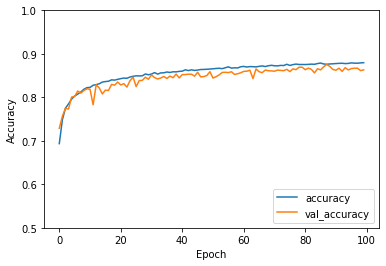

In [9]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
# plt.savefig("ann_acc.png", dpi=500)

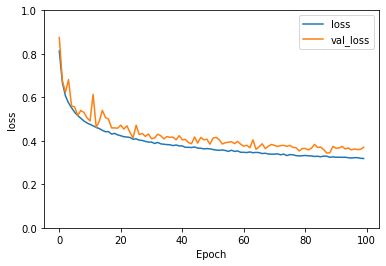

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)

In [0]:
model.save('DNN_Adam_100.h5')

In [12]:
model_2 = models.load_model('DNN_Adam_100.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
epoch = 100
batch_size = 256
learning_rate = 5e-3
initializer = initializers.he_normal(seed=114)

In [14]:
adam = optimizers.Adam(lr = learning_rate)
model_2.compile(optimizer= adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
aug = preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True)
batches = aug.flow(x_train, y_train, batch_size=batch_size)
val_batches = aug.flow(x_test, y_test, batch_size=batch_size)
history = model_2.fit_generator(batches, 
                               epochs=epoch,
                               validation_data=val_batches, verbose=2)

Epoch 1/100
Epoch 1/100
235/235 - 25s - loss: 0.2985 - acc: 0.8885 - val_loss: 0.3496 - val_acc: 0.8747
Epoch 2/100
Epoch 1/100
235/235 - 24s - loss: 0.2949 - acc: 0.8878 - val_loss: 0.3392 - val_acc: 0.8760
Epoch 3/100
Epoch 1/100
235/235 - 24s - loss: 0.2931 - acc: 0.8892 - val_loss: 0.3605 - val_acc: 0.8713
Epoch 4/100
Epoch 1/100
235/235 - 24s - loss: 0.2922 - acc: 0.8903 - val_loss: 0.3483 - val_acc: 0.8727
Epoch 5/100
Epoch 1/100
235/235 - 24s - loss: 0.2921 - acc: 0.8903 - val_loss: 0.3405 - val_acc: 0.8744
Epoch 6/100
Epoch 1/100
235/235 - 24s - loss: 0.2932 - acc: 0.8892 - val_loss: 0.3402 - val_acc: 0.8743
Epoch 7/100
Epoch 1/100
235/235 - 24s - loss: 0.2942 - acc: 0.8890 - val_loss: 0.3530 - val_acc: 0.8678
Epoch 8/100
Epoch 1/100
235/235 - 24s - loss: 0.2948 - acc: 0.8884 - val_loss: 0.3479 - val_acc: 0.8752
Epoch 9/100
Epoch 1/100
235/235 - 24s - loss: 0.2942 - acc: 0.8888 - val_loss: 0.3463 - val_acc: 0.8774
Epoch 10/100
Epoch 1/100
235/235 - 24s - loss: 0.2941 - acc: 0.8

In [15]:
test_loss, test_acc = model_2.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.3245 - acc: 0.8853


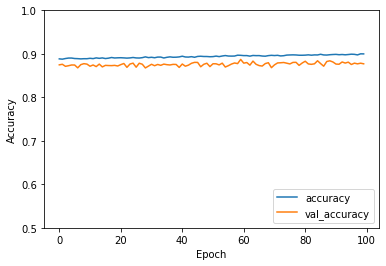

In [16]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
# plt.savefig("ann_acc.png", dpi=500)

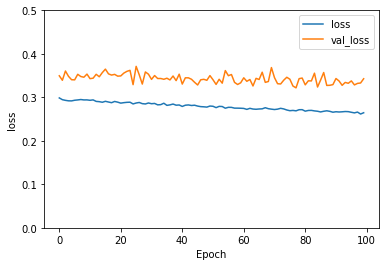

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, .5])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)

In [0]:
model_2.save('DNN_Adam_200.h5')

In [0]:
model_3 = models.load_model('DNN_Adam_200.h5')

In [0]:
epoch = 100
batch_size = 512
learning_rate = 5e-3

In [21]:
sgd = optimizers.SGD(lr = learning_rate)
model_3.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
aug = preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True)
batches = aug.flow(x_train, y_train, batch_size=batch_size)
val_batches = aug.flow(x_test, y_test, batch_size=batch_size)
history = model_3.fit_generator(batches, 
                               epochs=epoch,
                               validation_data=val_batches, verbose=2)

Epoch 1/100
Epoch 1/100
118/118 - 25s - loss: 0.2506 - acc: 0.9040 - val_loss: 0.3313 - val_acc: 0.8830
Epoch 2/100
Epoch 1/100
118/118 - 23s - loss: 0.2472 - acc: 0.9053 - val_loss: 0.3347 - val_acc: 0.8833
Epoch 3/100
Epoch 1/100
118/118 - 23s - loss: 0.2470 - acc: 0.9051 - val_loss: 0.3288 - val_acc: 0.8882
Epoch 4/100
Epoch 1/100
118/118 - 23s - loss: 0.2484 - acc: 0.9049 - val_loss: 0.3399 - val_acc: 0.8837
Epoch 5/100
Epoch 1/100
118/118 - 23s - loss: 0.2465 - acc: 0.9049 - val_loss: 0.3286 - val_acc: 0.8844
Epoch 6/100
Epoch 1/100
118/118 - 23s - loss: 0.2469 - acc: 0.9062 - val_loss: 0.3302 - val_acc: 0.8865
Epoch 7/100
Epoch 1/100
118/118 - 23s - loss: 0.2446 - acc: 0.9061 - val_loss: 0.3314 - val_acc: 0.8869
Epoch 8/100
Epoch 1/100
118/118 - 23s - loss: 0.2455 - acc: 0.9062 - val_loss: 0.3426 - val_acc: 0.8823
Epoch 9/100
Epoch 1/100
118/118 - 23s - loss: 0.2452 - acc: 0.9060 - val_loss: 0.3353 - val_acc: 0.8819
Epoch 10/100
Epoch 1/100
118/118 - 23s - loss: 0.2462 - acc: 0.9

In [22]:
test_loss, test_acc = model_3.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.3062 - acc: 0.8965


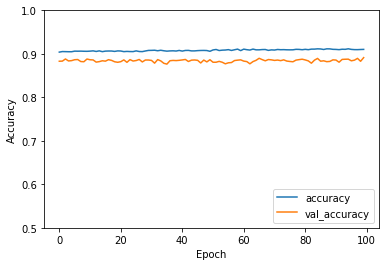

In [23]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
# plt.savefig("ann_acc.png", dpi=500)

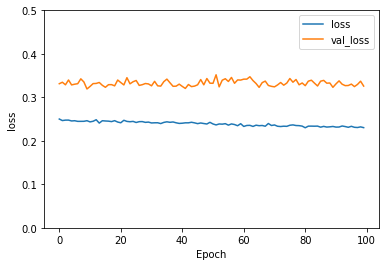

In [24]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, .5])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)

In [0]:
model_3.save('DNN_Adam_300.h5')

In [0]:
model_4 = models.load_model('DNN_Adam_300.h5')

In [0]:
epoch = 50
batch_size = 1024
learning_rate = 1e-3

In [28]:
sgd = optimizers.SGD(lr = learning_rate)
model_4.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
aug = preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True)
batches = aug.flow(x_train, y_train, batch_size=batch_size)
val_batches = aug.flow(x_test, y_test, batch_size=batch_size)
history = model_4.fit_generator(batches, 
                               epochs=epoch,
                               validation_data=val_batches, verbose=2)

Epoch 1/50
Epoch 1/50
59/59 - 27s - loss: 0.2230 - acc: 0.9142 - val_loss: 0.3253 - val_acc: 0.8881
Epoch 2/50
Epoch 1/50
59/59 - 23s - loss: 0.2208 - acc: 0.9157 - val_loss: 0.3244 - val_acc: 0.8879
Epoch 3/50
Epoch 1/50
59/59 - 23s - loss: 0.2218 - acc: 0.9143 - val_loss: 0.3215 - val_acc: 0.8874
Epoch 4/50
Epoch 1/50
59/59 - 23s - loss: 0.2196 - acc: 0.9157 - val_loss: 0.3201 - val_acc: 0.8896
Epoch 5/50
Epoch 1/50
59/59 - 23s - loss: 0.2202 - acc: 0.9154 - val_loss: 0.3154 - val_acc: 0.8915
Epoch 6/50
Epoch 1/50
59/59 - 23s - loss: 0.2202 - acc: 0.9156 - val_loss: 0.3157 - val_acc: 0.8938
Epoch 7/50
Epoch 1/50
59/59 - 23s - loss: 0.2237 - acc: 0.9140 - val_loss: 0.3174 - val_acc: 0.8896
Epoch 8/50
Epoch 1/50
59/59 - 22s - loss: 0.2216 - acc: 0.9136 - val_loss: 0.3131 - val_acc: 0.8926
Epoch 9/50
Epoch 1/50
59/59 - 23s - loss: 0.2190 - acc: 0.9161 - val_loss: 0.3227 - val_acc: 0.8903
Epoch 10/50
Epoch 1/50
59/59 - 23s - loss: 0.2195 - acc: 0.9148 - val_loss: 0.3172 - val_acc: 0.8898

In [29]:
test_loss, test_acc = model_4.evaluate(x_test, y_test, verbose=2)

10000/10000 - 2s - loss: 0.2956 - acc: 0.9011


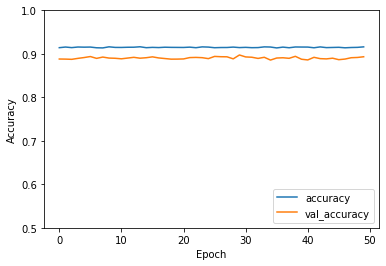

In [30]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
# plt.savefig("ann_acc.png", dpi=500)

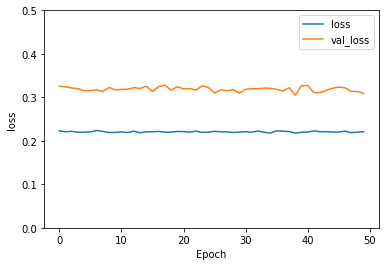

In [31]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, .5])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)

In [0]:
model_4.save('DNN_Adam_350.h5')

In [0]:
model_5 = models.load_model('DNN_Adam_350.h5')

In [0]:
epoch = 50
batch_size = 2048
learning_rate = 1e-3

In [35]:
sgd = optimizers.SGD(lr = learning_rate)
model_5.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
aug = preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True)
batches = aug.flow(x_train, y_train, batch_size=batch_size)
val_batches = aug.flow(x_test, y_test, batch_size=batch_size)
history = model_5.fit_generator(batches, 
                               epochs=epoch,
                               validation_data=val_batches, verbose=2)

Epoch 1/50
Epoch 1/50
30/30 - 26s - loss: 0.2201 - acc: 0.9159 - val_loss: 0.3243 - val_acc: 0.8898
Epoch 2/50
Epoch 1/50
30/30 - 22s - loss: 0.2177 - acc: 0.9162 - val_loss: 0.3132 - val_acc: 0.8923
Epoch 3/50
Epoch 1/50
30/30 - 22s - loss: 0.2158 - acc: 0.9168 - val_loss: 0.3200 - val_acc: 0.8900
Epoch 4/50
Epoch 1/50
30/30 - 22s - loss: 0.2196 - acc: 0.9152 - val_loss: 0.3215 - val_acc: 0.8908
Epoch 5/50
Epoch 1/50
30/30 - 22s - loss: 0.2175 - acc: 0.9154 - val_loss: 0.3200 - val_acc: 0.8929
Epoch 6/50
Epoch 1/50
30/30 - 22s - loss: 0.2163 - acc: 0.9168 - val_loss: 0.3170 - val_acc: 0.8917
Epoch 7/50
Epoch 1/50
30/30 - 22s - loss: 0.2175 - acc: 0.9156 - val_loss: 0.3130 - val_acc: 0.8904
Epoch 8/50
Epoch 1/50
30/30 - 22s - loss: 0.2186 - acc: 0.9159 - val_loss: 0.3128 - val_acc: 0.8935
Epoch 9/50
Epoch 1/50
30/30 - 22s - loss: 0.2196 - acc: 0.9144 - val_loss: 0.3171 - val_acc: 0.8905
Epoch 10/50
Epoch 1/50
30/30 - 22s - loss: 0.2164 - acc: 0.9161 - val_loss: 0.3147 - val_acc: 0.8911

In [36]:
test_loss, test_acc = model_5.evaluate(x_test, y_test, verbose=2)

10000/10000 - 2s - loss: 0.2955 - acc: 0.9005


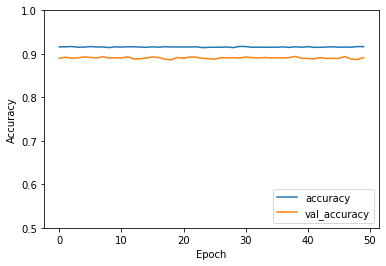

In [37]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
# plt.savefig("ann_acc.png", dpi=500)

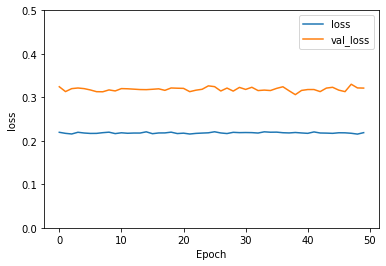

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, .5])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)

In [0]:
model_5.save('DNN_Adam_400.h5')

In [0]:
model_6 = models.load_model('DNN_Adam_400.h5')

In [0]:
epoch = 50
batch_size = 4096
learning_rate = 1e-4

In [45]:
sgd = optimizers.SGD(lr = learning_rate)
model_6.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
aug = preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                             height_shift_range=0.1,
                                             horizontal_flip=True)
batches = aug.flow(x_train, y_train, batch_size=batch_size)
val_batches = aug.flow(x_test, y_test, batch_size=batch_size)
history = model_6.fit_generator(batches, 
                               epochs=epoch,
                               validation_data=val_batches, verbose=2)

Epoch 1/50
Epoch 1/50
15/15 - 25s - loss: 0.2183 - acc: 0.9167 - val_loss: 0.3133 - val_acc: 0.8905
Epoch 2/50
Epoch 1/50
15/15 - 23s - loss: 0.2164 - acc: 0.9166 - val_loss: 0.3251 - val_acc: 0.8882
Epoch 3/50
Epoch 1/50
15/15 - 22s - loss: 0.2147 - acc: 0.9171 - val_loss: 0.3203 - val_acc: 0.8898
Epoch 4/50
Epoch 1/50
15/15 - 23s - loss: 0.2173 - acc: 0.9163 - val_loss: 0.3212 - val_acc: 0.8895
Epoch 5/50
Epoch 1/50
15/15 - 23s - loss: 0.2180 - acc: 0.9162 - val_loss: 0.3215 - val_acc: 0.8893
Epoch 6/50
Epoch 1/50
15/15 - 23s - loss: 0.2180 - acc: 0.9155 - val_loss: 0.3313 - val_acc: 0.8932
Epoch 7/50
Epoch 1/50
15/15 - 22s - loss: 0.2168 - acc: 0.9165 - val_loss: 0.3190 - val_acc: 0.8917
Epoch 8/50
Epoch 1/50
15/15 - 23s - loss: 0.2179 - acc: 0.9149 - val_loss: 0.3255 - val_acc: 0.8914
Epoch 9/50
Epoch 1/50
15/15 - 23s - loss: 0.2177 - acc: 0.9161 - val_loss: 0.3122 - val_acc: 0.8908
Epoch 10/50
Epoch 1/50
15/15 - 21s - loss: 0.2172 - acc: 0.9168 - val_loss: 0.3150 - val_acc: 0.8884

In [46]:
test_loss, test_acc = model_6.evaluate(x_test, y_test, verbose=2)

10000/10000 - 2s - loss: 0.2955 - acc: 0.9010


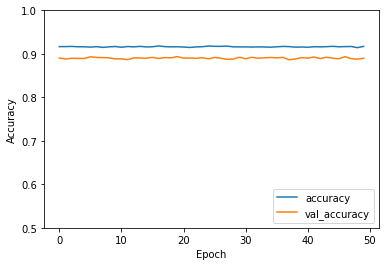

In [47]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
# plt.savefig("ann_acc.png", dpi=500)

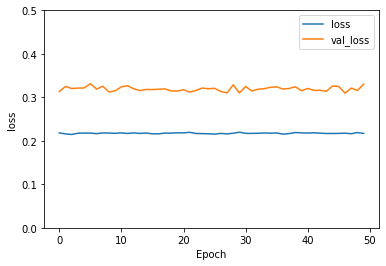

In [48]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, .5])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)